# Load libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Clone full repo from Github
Note: If repo has previously been cloned, but you need to pull latest files, open a Terminal session and run `cd data-innovation-days-2025` to change to the repo directory, then run `git pull origin` to pull all files. Recommend then closing the Colab session and re-starting to ensure everything refreshes.


In [2]:
if not os.path.exists('data-innovation-days-2025'):
  !git clone https://github.com/jeffjaylacs/data-innovation-days-2025.git
  print("Directory 'data-innovation-days-2025' created successfully.")
else:
  print("Directory 'data-innovation-days-2025' already exists. Skipping clone.")

Cloning into 'data-innovation-days-2025'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 52 (delta 20), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (52/52), 3.73 MiB | 3.32 MiB/s, done.
Resolving deltas: 100% (20/20), done.
Directory 'data-innovation-days-2025' created successfully.


# Read and preview data

In [3]:
df = pd.read_csv('data-innovation-days-2025/data/train_subset.csv')
display(df.head(10))

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a
5,5,p,4.30,x,t,n,f,s,c,n,...,NaN,NaN,w,NaN,n,t,z,NaN,d,a
6,6,e,9.65,p,y,w,f,e,c,k,...,NaN,s,w,NaN,NaN,t,e,NaN,g,w
7,7,p,4.55,x,e,e,f,a,NaN,y,...,NaN,NaN,y,NaN,w,t,z,NaN,d,a
8,8,p,7.36,f,h,e,f,x,d,w,...,b,NaN,w,NaN,NaN,f,f,NaN,d,a
9,9,e,6.45,x,t,n,f,a,d,w,...,NaN,NaN,e,NaN,NaN,f,f,NaN,d,a


# Exploratory Data Analysis

## Univariate analysis


Descriptive Statistics:
count    250000.000000
mean          6.314365
std           4.654346
min           0.410000
25%           3.320000
50%           5.760000
75%           8.240000
max          59.510000
Name: cap-diameter, dtype: float64


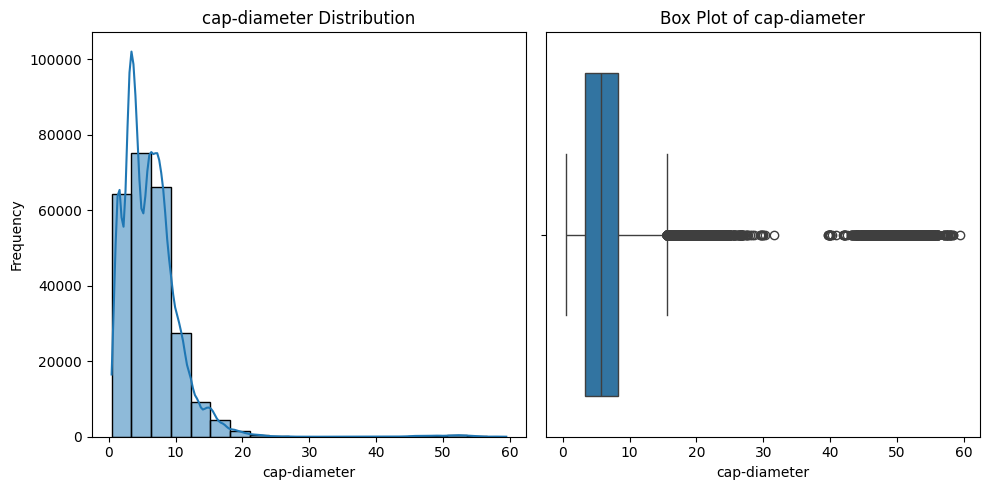

In [4]:
# Univariate Analysis on the 'cap-diameter' column

# 1. Descriptive Statistics
print("\nDescriptive Statistics:")
print(df['cap-diameter'].describe())

# 2. Visualization: Histogram
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['cap-diameter'], bins=20, kde=True)
plt.title('cap-diameter Distribution')
plt.xlabel('cap-diameter')
plt.ylabel('Frequency')

# 3. Visualization: Box Plot
plt.subplot(1, 2, 2)
sns.boxplot(x=df['cap-diameter'])
plt.title('Box Plot of cap-diameter')
plt.xlabel('cap-diameter')

# Show the plots
plt.tight_layout()
plt.show()


Frequency Distribution:
gill-spacing
c          107004
Missing    100403
d           32912
f            9664
a               4
e               4
b               3
x               1
3.61            1
2.69            1
k               1
4.8             1
y               1
Name: count, dtype: int64

Descriptive Statistics:
count     250000
unique        13
top            c
freq      107004
Name: gill-spacing, dtype: object


/tmp/ipython-input-3555775958.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='gill-spacing',palette='deep')


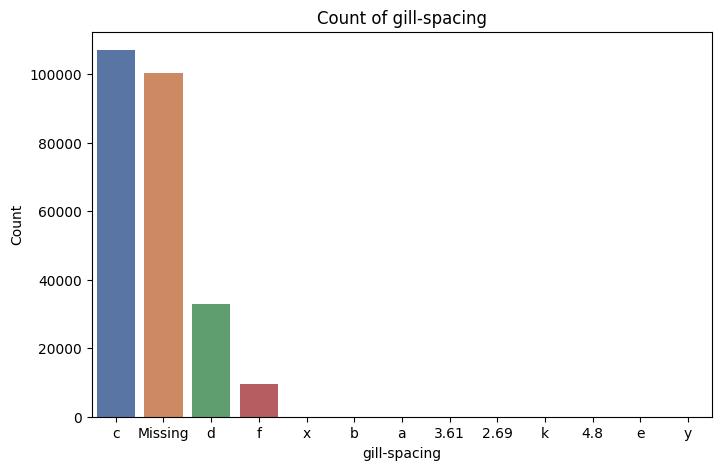

In [5]:
# Univariate Analysis on the 'gill-spacing' column

# 1. Fill missing values with a placeholder for visualization purposes
df['gill-spacing'] = df['gill-spacing'].fillna('Missing')

# 2. Frequency distribution
frequency_distribution = df['gill-spacing'].value_counts()
print("\nFrequency Distribution:")
print(frequency_distribution)

# 3. Descriptive statistics for categorical data
descriptive_stats = df['gill-spacing'].describe()
print("\nDescriptive Statistics:")
print(descriptive_stats)

# 4. Visualization: Bar Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gill-spacing',palette='deep')
plt.title('Count of gill-spacing')
plt.xlabel('gill-spacing')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [6]:
# Count missing values in each column
missing_values_count = df.isna().sum()

# Calculate the percentage of missing values in each column
missing_values_percent = (missing_values_count / len(df)) * 100

# Combine the results into a DataFrame for better readability
missing_summary = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percent
})

# Print the results
print("\nMissing Values Count and Percentage in Each Column:")
print(missing_summary)


Missing Values Count and Percentage in Each Column:
                      Missing Count  Missing Percentage
id                                0              0.0000
class                             0              0.0000
cap-diameter                      0              0.0000
cap-shape                         5              0.0020
cap-surface                   53811             21.5244
cap-color                         0              0.0000
does-bruise-or-bleed              0              0.0000
gill-attachment               42029             16.8116
gill-spacing                      0              0.0000
gill-color                        1              0.0004
stem-height                       0              0.0000
stem-width                        0              0.0000
stem-root                    221255             88.5020
stem-surface                 158825             63.5300
stem-color                        1              0.0004
veil-type                    237051             94.

## Weight of Evidence  
WoE provides insights into the relationship between a predictor variable (i.e. a feature) and the target variable. It is frequently used in logistic regression for understanding how each bin relates to the target, but can be helpful as part of EDA for any type of classification model.

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/tmp/ipython-input-830082263.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=woe_df, x='gill-spacing', y='WoE', palette='pastel')



Weight of Evidence DataFrame:
   gill-spacing  edible  poisonous       WoE
0          2.69       0          1      -inf
1          3.61       0          1      -inf
2           4.8       0          1      -inf
3       Missing   43114      57289 -0.096237
4             a       0          4      -inf
5             b       2          1  0.881171
6             c   45687      61317 -0.106219
7             d   19774      13138  0.596883
8             e       0          4      -inf
9             f    4706       4958  0.135860
10            k       0          1      -inf
11            x       0          1      -inf
12            y       0          1      -inf


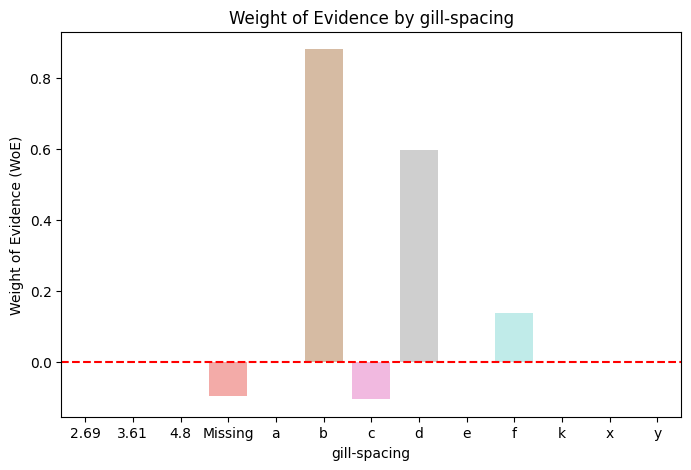

In [7]:
# Calculate the total number of edible (good) and poisonous (bad) outcomes
total_edible = df['class'].value_counts().get('e', 0)
total_poisonous = df['class'].value_counts().get('p', 0)

# Calculate the distribution of target variable by category
woe_df = df.groupby('gill-spacing')['class'].value_counts().unstack(fill_value=0).reset_index()
woe_df.columns.name = None  # Remove the name of the index

# Rename columns for clarity
woe_df.columns = ['gill-spacing', 'edible', 'poisonous']

# Calculate the proportions
woe_df['edible_proportion'] = woe_df['edible'] / total_edible
woe_df['poisonous_proportion'] = woe_df['poisonous'] / total_poisonous

# Calculate WoE
woe_df['WoE'] = np.log(woe_df['edible_proportion'] / woe_df['poisonous_proportion'])

# Display the WoE DataFrame
print("\nWeight of Evidence DataFrame:")
print(woe_df[['gill-spacing', 'edible', 'poisonous', 'WoE']])

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(data=woe_df, x='gill-spacing', y='WoE', palette='pastel')
plt.title('Weight of Evidence by gill-spacing')
plt.xlabel('gill-spacing')
plt.ylabel('Weight of Evidence (WoE)')
plt.axhline(0, color='red', linestyle='--')  # Reference line at WoE = 0
plt.show()

# Feature Engineering

In [8]:
# Create a new column 'stem-area' as the product of 'stem-height' and 'stem-width'
df['stem-area'] = df['stem-height'] * df['stem-width']

# Display the updated DataFrame with the new column
print("\nUpdated DataFrame with 'stem-area':")
display(df.head(10))


Updated DataFrame with 'stem-area':


,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,stem-area
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,w,NaN,NaN,f,f,NaN,d,a,69.4089
1,1,p,4.51,x,h,o,f,a,c,n,...,y,o,NaN,NaN,t,z,NaN,d,w,31.0392
2,2,e,6.94,f,s,b,f,x,c,w,...,s,n,NaN,NaN,f,f,NaN,l,w,68.0205
3,3,e,3.88,f,y,g,f,s,Missing,g,...,NaN,w,NaN,NaN,f,f,NaN,d,u,27.1648
4,4,e,5.85,x,l,w,f,d,Missing,w,...,NaN,w,NaN,NaN,f,f,NaN,g,a,28.1732
5,5,p,4.30,x,t,n,f,s,c,n,...,NaN,w,NaN,n,t,z,NaN,d,a,48.4620
6,6,e,9.65,p,y,w,f,e,c,k,...,s,w,NaN,NaN,t,e,NaN,g,w,241.9983
7,7,p,4.55,x,e,e,f,a,Missing,y,...,NaN,y,NaN,w,t,z,NaN,d,a,81.1887
8,8,p,7.36,f,h,e,f,x,d,w,...,NaN,w,NaN,NaN,f,f,NaN,d,a,98.8401
9,9,e,6.45,x,t,n,f,a,d,w,...,NaN,e,NaN,NaN,f,f,NaN,d,a,91.0501


# Model Training

## Model data pre-processing  
Pre-processing your data so that it is compatible with common model algorithms is a bit different than the EDA exercise above.  While EDA is by definition "exporatory", the pre-processing step is not only conducted on the data during model training, but is then also required and replicated in production on new/live data to make that data suitable for generating predictions with the model.  The steps below get the data ready for model training.

### Target Definition  
Many classification model algorithms require the binary target to be represented by a 1 or 0.  We will call "poisonous" our positive class and represent it with a 1, and edible will be represented by a 0. Calling a poisonous mushroom the "positive" class sounds counter-intuitive, but that type of terminology is common (e.g. a patient test positive for a disease, or a customer defaults on a loan and "hits the target", etc.)

In [9]:
df["class"] = df["class"].map({"e": 0, "p": 1})

frequency = df["class"].value_counts()
print(frequency)


class
1    136717
0    113283
Name: count, dtype: int64


### Handling character/string columns  
Many python libraries used for training models require character/string columns to converted to numeric values.  There are 2 primary ways to accomplish this: One-hot encoding or indexing.

In [9]:
# Step 1: Identify non-numeric columns excluding 'id' and 'class'
non_numeric_columns = df.select_dtypes(include=['object']).columns.tolist()
non_numeric_columns = [col for col in non_numeric_columns if col not in ['id', 'class']]

# Step 2: Identify columns that need indexing
indexed_features = ['season'] if 'season' in non_numeric_columns else []
non_numeric_columns.remove('season') if 'season' in non_numeric_columns else None

# Step 3: Create a mapping for the indexed feature (season) to numeric indices
season_mapping = {'s': 0, 'u': 1, 'a': 2, 'w': 3}
df['season_index'] = df['season'].map(season_mapping)
df.drop(columns=['season'], inplace=True)

# Step 4: Apply one-hot encoding to the remaining non-numeric columns
df_encoded = pd.get_dummies(df, columns=non_numeric_columns)

# Iterate through the columns of the encoded DataFrame and convert boolean columns to integers
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':  # Check if the column type is boolean
        df_encoded[col] = df_encoded[col].astype(int)


## Create train and test data sets  
Now that the data has been pre-processed, it is suitable for feeding into the modeling algorithm. The model will be built and tuned on the training data. The test data will be set completely off to the side and only used for final model performance evaluation.

In [10]:
# Split the DataFrame.  random_state is a seed for reproducibility purposes.
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

## Train the model

In [11]:
# Features and target from train_df
X = train_df.drop(columns=["class"])
y = train_df["class"]

# Initialize the model with default hyperparameters
rf_model = RandomForestClassifier()

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean accuracy:", cv_scores.mean())


ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'x'


# Model Evaluation

In [ ]:
# Model evaluation placeholder